In [2]:
import pandas as pd

df = pd.read_csv("../data/Cleaned/reviews_cleaned.csv")

# Count themes by sentiment
theme_sentiment = df.groupby(['identified_theme', 'sentiment_label']).size().unstack(fill_value=0)
theme_sentiment['total'] = theme_sentiment.sum(axis=1)
theme_sentiment = theme_sentiment.sort_values(by='total', ascending=False)
theme_sentiment.head()

sentiment_label,negative,neutral,positive,total
identified_theme,,,,
"good, work, bad, nice, banking",26,545,204,775
"dashen, super, easy, fast, banking",0,66,14,80
"easy, use, wow, fast, simple",0,42,15,57
"download, want, banking, time, receipt",1,16,0,17


In [3]:
theme_sentiment['positive_ratio'] = theme_sentiment['positive'] / theme_sentiment['total']
theme_sentiment['negative_ratio'] = theme_sentiment['negative'] / theme_sentiment['total']

# driver identification

In [4]:
drivers = theme_sentiment[theme_sentiment['positive_ratio'] > 0.2].sort_values('positive_ratio', ascending=False)
print("Drivers (High Positive Sentiment):")
drivers[['positive', 'positive_ratio', 'total']].head()

Drivers (High Positive Sentiment):


sentiment_label,positive,positive_ratio,total
identified_theme,,,
"good, work, bad, nice, banking",204,0.263226,775
"easy, use, wow, fast, simple",15,0.263158,57


# Pain point Identification

In [5]:
pain_points = theme_sentiment[theme_sentiment['negative_ratio'] > 0.002].sort_values('negative_ratio', ascending=False)
print("\nPain Points (High Negative Sentiment):")
pain_points[['negative', 'negative_ratio', 'total']].head()


Pain Points (High Negative Sentiment):


sentiment_label,negative,negative_ratio,total
identified_theme,,,
"download, want, banking, time, receipt",1,0.058824,17
"good, work, bad, nice, banking",26,0.033548,775


# absolute count

In [6]:
top_positive = theme_sentiment.sort_values('positive', ascending=False).head()
top_negative = theme_sentiment.sort_values('negative', ascending=False).head()

print("\nTop Themes by Absolute Positive Counts:")
print(top_positive[['positive', 'total']])

print("\nTop Themes by Absolute Negative Counts:")
print(top_negative[['negative', 'total']])


Top Themes by Absolute Positive Counts:
sentiment_label                         positive  total
identified_theme                                       
good, work, bad, nice, banking               204    775
easy, use, wow, fast, simple                  15     57
dashen, super, easy, fast, banking            14     80
download, want, banking, time, receipt         0     17

Top Themes by Absolute Negative Counts:
sentiment_label                         negative  total
identified_theme                                       
good, work, bad, nice, banking                26    775
download, want, banking, time, receipt         1     17
dashen, super, easy, fast, banking             0     80
easy, use, wow, fast, simple                   0     57


## Visualization

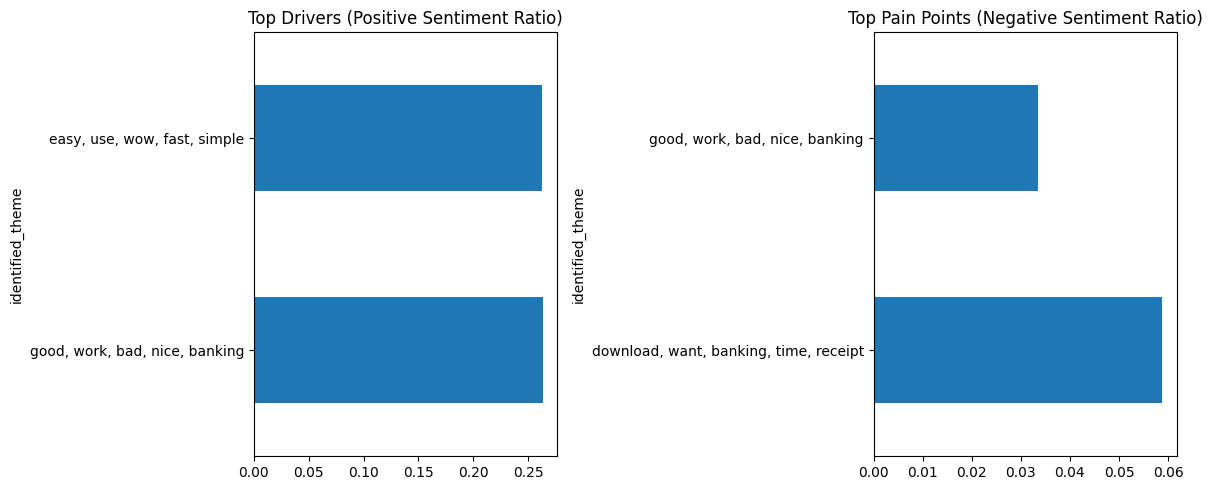

In [7]:
import matplotlib.pyplot as plt

# Plot top drivers and pain points
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

drivers.head(10)['positive_ratio'].plot(kind='barh', ax=ax1, title='Top Drivers (Positive Sentiment Ratio)')
pain_points.head(10)['negative_ratio'].plot(kind='barh', ax=ax2, title='Top Pain Points (Negative Sentiment Ratio)')

plt.tight_layout()
plt.show()

# analysis for CBE

In [ ]:
# Filter for CBE + negative sentiment, and select specific columns
cbe_negative_reviews = df[
    (df['bank'] == 'CBE') & 
    (df['sentiment_label'] == 'negative')
][['review_text_clean', 'identified_theme']]

# Display the filtered results
print(cbe_negative_reviews['review_text_clean'])

71                         bad load need improve service
82                                              hate app
97     screenshot reffresh option annoying make trans...
171                          bad mobile banking see life
Name: review_text_clean, dtype: object


In [14]:
# Filter for CBE + negative sentiment, and select specific columns
cbe_negative_reviews = df[
    (df['bank'] == 'CBE') & 
    (df['sentiment_label'] == 'positive')
][['review_text_clean', 'identified_theme']]

# Display the filtered results
print(cbe_negative_reviews['review_text_clean'])

1                              good app
2                     amazing app enjoy
3                                  well
5      great app like carry bank pocket
7                   happy app siple use
                     ...               
293                           great app
295                          great work
297         excellent match application
298                            good app
299                       excellent app
Name: review_text_clean, Length: 103, dtype: object


# analysis for BOA

In [ ]:
# Filter for BOA + negative sentiment, and select specific columns
boa_negative_reviews = df[
    (df['bank'] == 'BOA') & 
    (df['sentiment_label'] == 'negative')
][['review_text_clean', 'identified_theme']]

# Display the filtered results
print(boa_negative_reviews['review_text_clean'])

311                                     guy keep get bad
323    keep show pop turn developer option tho turn w...
343                       bad app bank u ashamed scammer
366                                     poor proformance
380                                      update annoying
388         horrible customer service app crash horrible
411                                                  bad
420                                 bad banking app work
456                                     bad app see like
462                                     bad app vety bad
479                                                  bad
513    download screenshot payment receipt kinda bad app
527                                       bad experience
531    sick tiere enable disable developer option eve...
532                                              bad app
542                                             horrible
548                                              bad app
559                            

In [21]:
# Filter for BOA + negative sentiment, and select specific columns
boa_negative_reviews = df[
    (df['bank'] == 'BOA') & 
    (df['sentiment_label'] == 'positive')
][['review_text_clean', 'identified_theme']]

# Display the filtered results
print(boa_negative_reviews['review_text_clean'])

303                                          exceptional
304                                 boa mobile good bank
309                                         good service
318                                like application good
320                                                 good
325                                            great boa
338                                     good application
344                                            great boa
348                                            wonderful
350                                                 love
353                                         improve good
365                                    good feature work
368                                 verry amazing app ib
371                              good banking app wworld
372                                    nice app easy use
376                                            good bank
377    easy convienient use perfect high prefrence ch...
378                            

# analysis for Dashen

In [ ]:
# Filter for Dashen + negative sentiment, and select specific columns
dashen_negative_reviews = df[
    (df['bank'] == 'Dashen') & 
    (df['sentiment_label'] == 'negative')
][['review_text_clean', 'identified_theme']]

# Display the filtered results
print(dashen_negative_reviews['review_text_clean'])

657        bad
853    bad app
Name: review_text_clean, dtype: object


In [24]:
# Filter for Dashen + negative sentiment, and select specific columns
dashen_negative_reviews = df[
    (df['bank'] == 'Dashen') & 
    (df['sentiment_label'] == 'positive')
][['review_text_clean', 'identified_theme']]

# Display the filtered results
print(dashen_negative_reviews['review_text_clean'])

604                                         app good guy
610                                             good app
616                                     nice application
622                  good time say duplicate transaction
623                                                 nice
                             ...                        
904                                            good need
906                        amazing app thank dashen bank
908                      excellent ui ux banking service
914    fast reliable user friendly amazing chatting f...
915                                               v good
Name: review_text_clean, Length: 87, dtype: object
